In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter


In [19]:
data=pd.read_csv("Zoo.csv")

In [20]:
print("\nClass Distribution:")
print(data["type"].value_counts())


Class Distribution:
type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


<ipython-input-21-bd0cde16d2ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=data, palette="coolwarm")


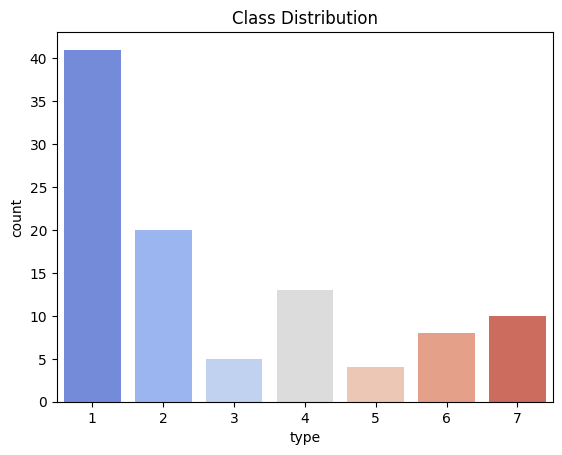

In [21]:
sns.countplot(x="type", data=data, palette="coolwarm")
plt.title("Class Distribution")
plt.show()

In [23]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


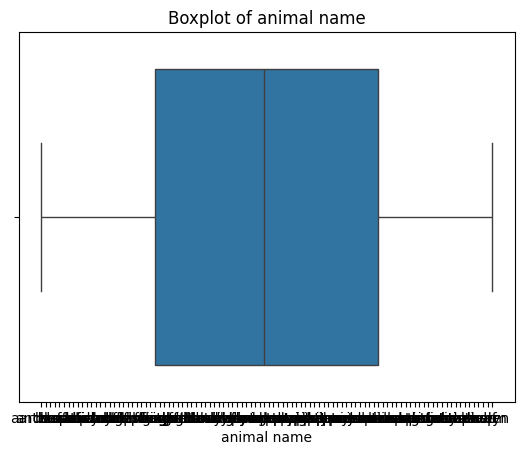

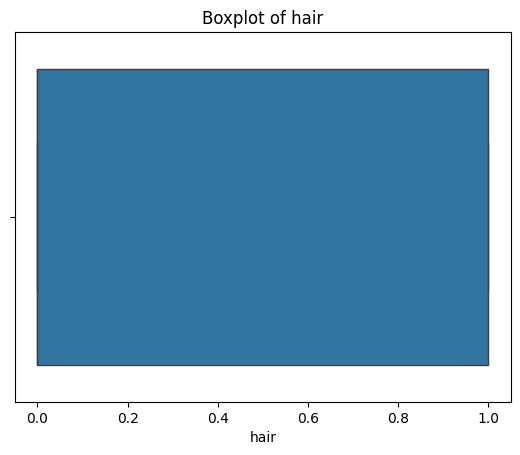

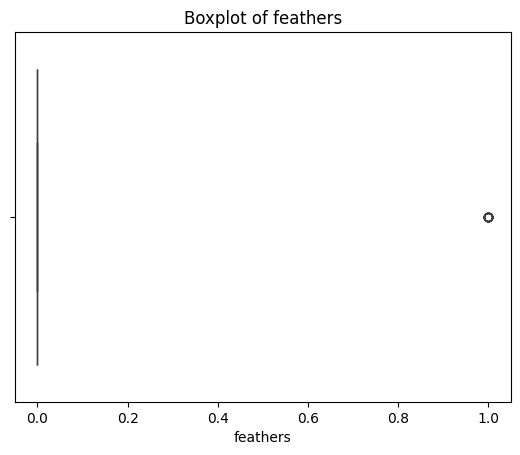

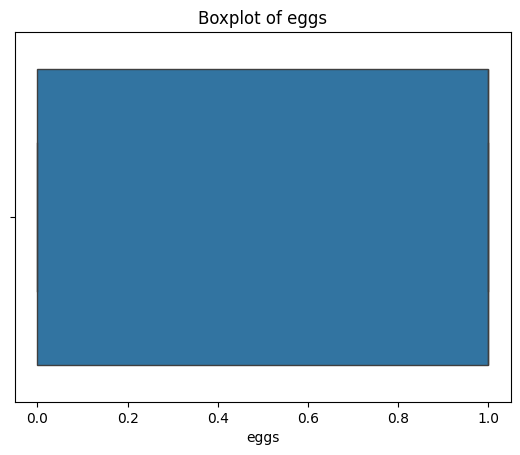

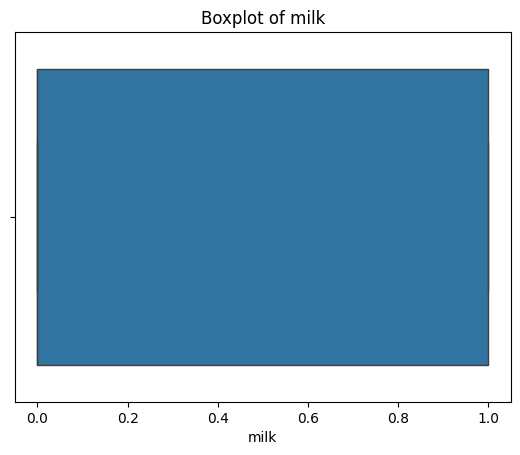

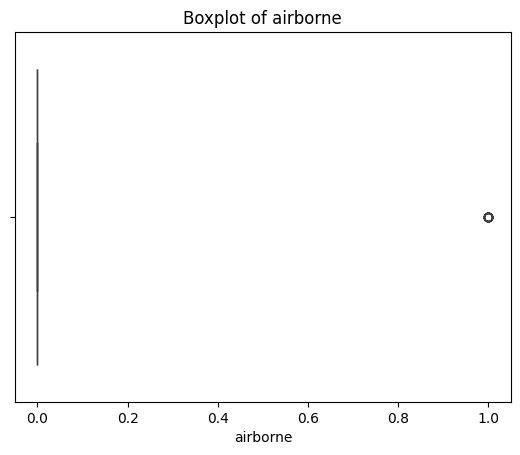

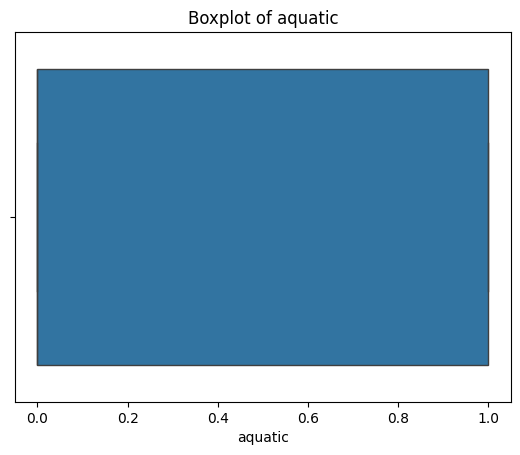

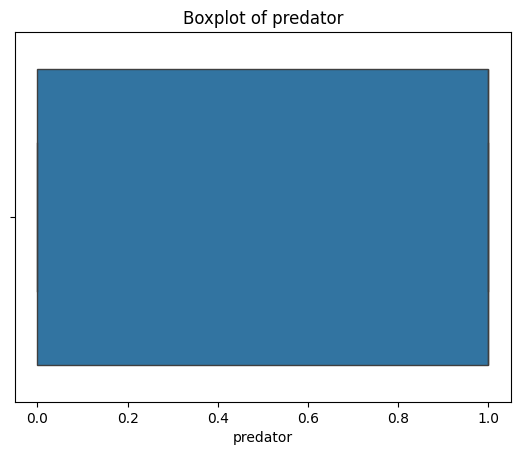

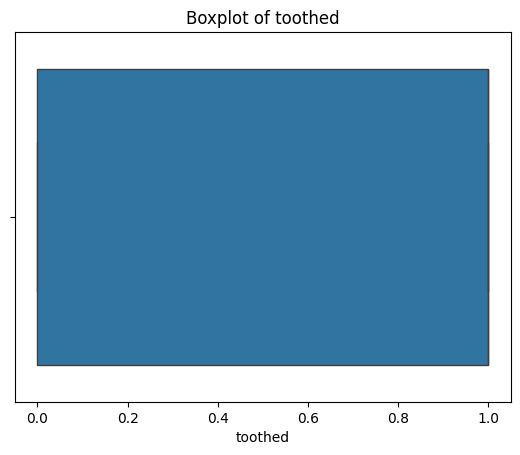

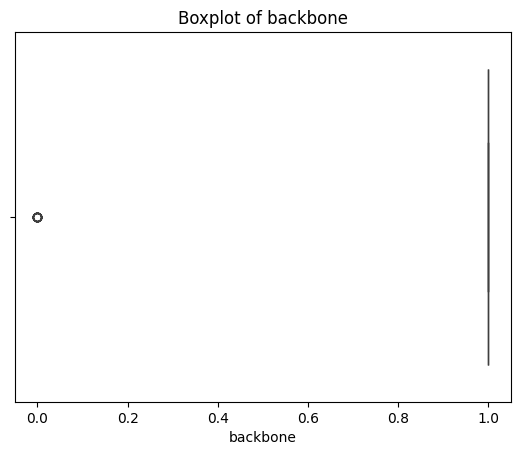

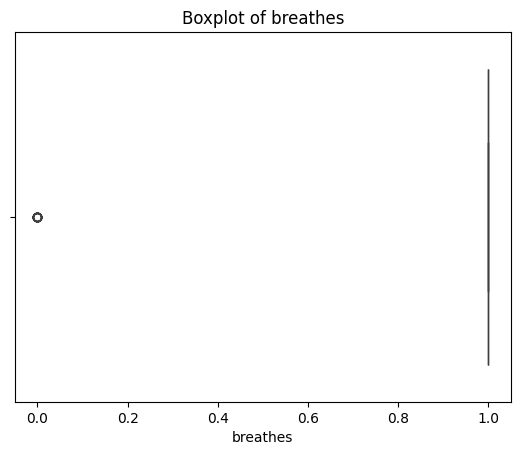

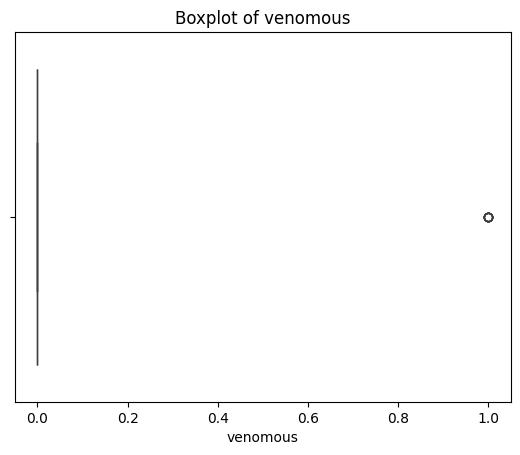

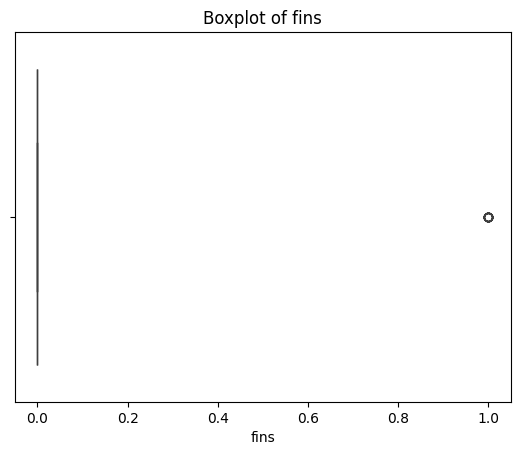

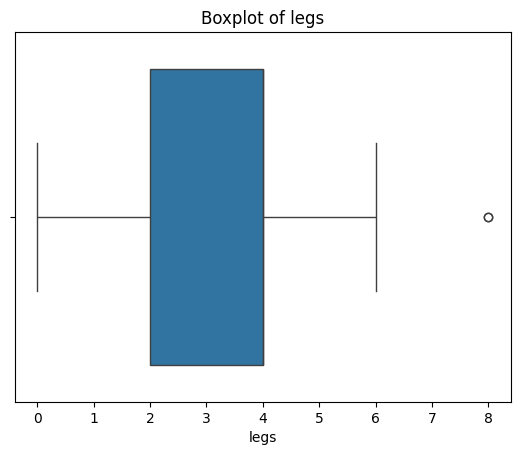

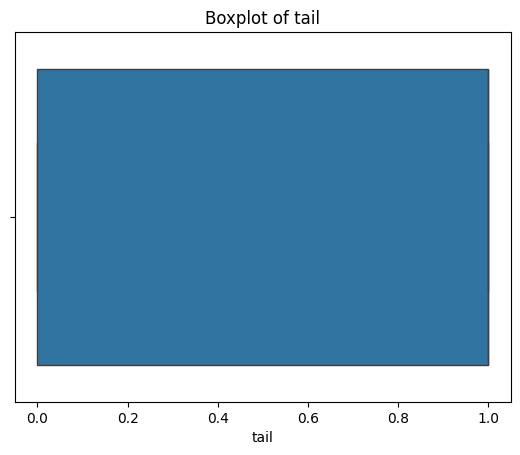

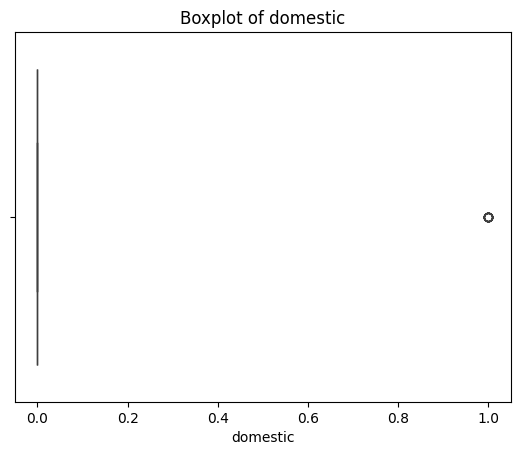

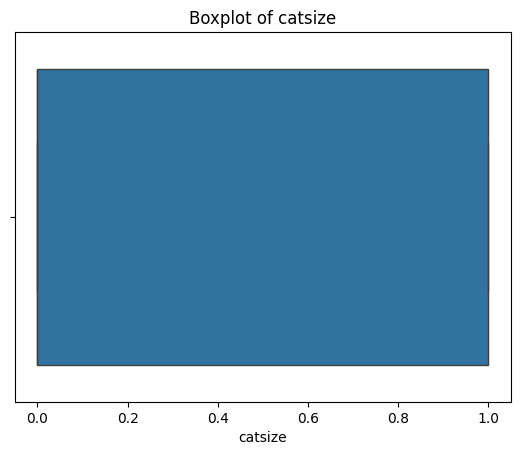

In [24]:
for column in data.columns[:-1]:
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [33]:
# Separate features and target variable
X = data.drop(["type", "animal name"], axis=1)  # Exclude 'animal name' column
y = data["type"]

In [34]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
#Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
!pip install imbalanced-learn
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

In [57]:
#Oversampling using SMOTE
print("\nClass Distribution Before Resampling:", Counter(y_train))
smote = SMOTE(random_state=42, k_neighbors=min(Counter(y_train).values()) - 1 if min(Counter(y_train).values()) > 1 else 1)

X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("\nClass Distribution After SMOTE (Oversampling):")
print(Counter(y_smote))


Class Distribution Before Resampling: Counter({1: 33, 2: 16, 4: 10, 7: 8, 6: 6, 3: 4, 5: 3})

Class Distribution After SMOTE (Oversampling):
Counter({7: 33, 3: 33, 2: 33, 4: 33, 1: 33, 6: 33, 5: 33})


In [60]:
#Undersampling using Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
print("\nClass Distribution After Random Undersampling:")
print(Counter(y_under))


Class Distribution After Random Undersampling:
Counter({1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3})


In [66]:
# Hybrid Method: SMOTEENN
smoteenn = SMOTEENN(random_state=42, smote=SMOTE(random_state=42, k_neighbors=min(Counter(y_train).values()) - 1 if min(Counter(y_train).values()) > 1 else 1))  # Adjust k_neighbors for SMOTE
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)
print("\nClass Distribution After SMOTEENN (Hybrid Method):")
print(Counter(y_smoteenn))


Class Distribution After SMOTEENN (Hybrid Method):
Counter({1: 33, 2: 33, 3: 33, 4: 33, 5: 33, 6: 33, 7: 32})


In [41]:
print("\nClass Distribution Before Resampling:", Counter(y_train))
smote = SMOTE(random_state=42, k_neighbors=min(Counter(y_train).values()) - 1 if min(Counter(y_train).values()) > 1 else 1)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class Distribution After SMOTE:", Counter(y_train_resampled))


Class Distribution Before Resampling: Counter({1: 33, 2: 16, 4: 10, 7: 8, 6: 6, 3: 4, 5: 3})
Class Distribution After SMOTE: Counter({7: 33, 3: 33, 2: 33, 4: 33, 1: 33, 6: 33, 5: 33})


In [68]:
# Apply KNN to Resampled Data (Optional)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X_test_scaled = scaler.transform(X_test)
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_smote, y_smote)
y_pred_smote = knn_smote.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
print("\nKNN Performance on SMOTE Data:")
print(classification_report(y_test, y_pred_smote))


KNN Performance on SMOTE Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         2

    accuracy                           0.90        21
   macro avg       0.64      0.71      0.67        21
weighted avg       0.86      0.90      0.87        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
# Train KNN on undersampled data
knn_under = KNeighborsClassifier(n_neighbors=5)
knn_under.fit(X_under, y_under)
y_pred_under = knn_under.predict(X_test_scaled)

In [72]:
print("\nKNN Performance on Undersampled Data:")
print(classification_report(y_test, y_pred_under))


KNN Performance on Undersampled Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2

    accuracy                           0.90        21
   macro avg       0.67      0.71      0.69        21
weighted avg       0.87      0.90      0.89        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
# Train KNN on SMOTEENN data
knn_smoteenn = KNeighborsClassifier(n_neighbors=5)
knn_smoteenn.fit(X_smoteenn, y_smoteenn)
y_pred_smoteenn = knn_smoteenn.predict(X_test_scaled)

print("\nKNN Performance on SMOTEENN Data:")
print(classification_report(y_test, y_pred_smoteenn))


KNN Performance on SMOTEENN Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         2

    accuracy                           0.90        21
   macro avg       0.64      0.71      0.67        21
weighted avg       0.86      0.90      0.87        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
#Implement the K-Nearest Neighbors Algorithm
# Choose value of K
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")  # Using Euclidean distance
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='euclidean')

In [76]:


y_pred = knn.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

In [78]:
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [79]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21


Confusion Matrix:
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [47]:
# Use PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

In [48]:
knn_pca = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn_pca.fit(X_train_pca, y_train_resampled)

KNeighborsClassifier(metric='euclidean')

In [49]:
# Plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

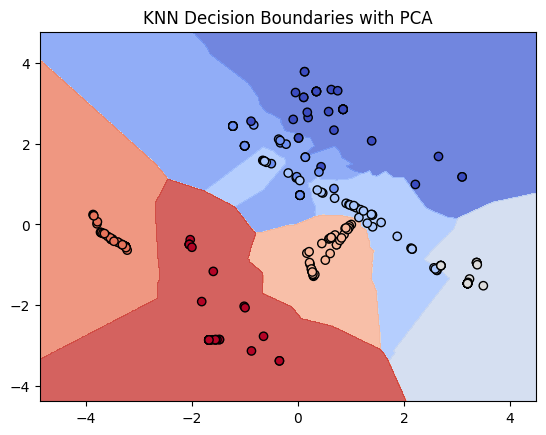

In [80]:
plot_decision_boundaries(X_train_pca, y_train_resampled, knn_pca, "KNN Decision Boundaries with PCA")

**What are the key hyperparameters in KNN?**

Key Hyperparameters in KNN:

Number of Neighbors (k): Determines the number of neighbors to consider for classification.

Distance Metric: Defines how distances are calculated e.g., Euclidean, Manhattan, Minkowski.

Weighting Scheme: Determines whether all neighbors are treated equally or closer ones have more influence e.g., 'uniform' vs 'distance'.

**What distance metrics can be used in KNN?**



Distance Metrics in KNN:

Euclidean Distance: Straight-line distance between two points
.
Manhattan Distance: Sum of absolute differences between coordinates.

Minkowski Distance: Generalization of Euclidean and Manhattan distances (with a parameter p).

Hamming Distance: Used for categorical variables.Cosine Similarity: Measures the angle between vectors (used for high-dimensional data).